In [19]:
import pandas as pd 
import fitz
import numpy as np
import re

from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words("spanish")

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

In [8]:
pdf = fitz.open('C:/Users/XboxL/Documents/01 - Maestria En Analitica de Datos/02 - Procesamiento de Lenguaje Natural (NLP) - Clase/Recursos/reglasYuGiOh.pdf')
pdf.loadPage(1).getText()

'2\n3\n1\nIndice\nComenzando\nCartas del Juego\nCómo Jugar\nl  Acerca del Juego  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1\nl Necesitarás de estas cosas para un Duelo  . . . . . . . . . . . . . . . . . 2\nl El Tablero de Juego . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 4\nl Cartas de Monstruo . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 6\nl Monstruos de Efecto. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 9\nl Monstruos de Péndulo . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 12\nl Monstruos Xyz. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 14\nl Monstruos de Sincronía . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16\nl Monstruos de Fusión. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 18\nl Monstruos de Ritual. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 19\nl Invocando

In [20]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

In [21]:
palabras = ""
for i in pdf:
    palabras += pre_procesado(i.getText())

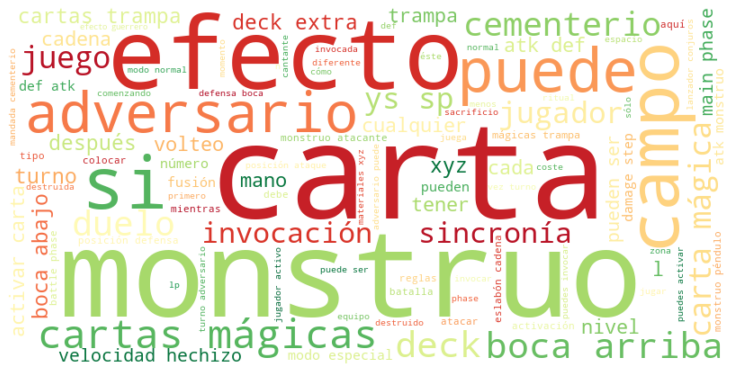

In [28]:
wordcloud = WordCloud(
                        width=800, 
                        height=400,
                        max_font_size=150, 
                        max_words=100,
                        background_color="white", 
                        colormap="RdYlGn",
                        stopwords=stopwords, 
                        collocations=True).generate(palabras) 

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

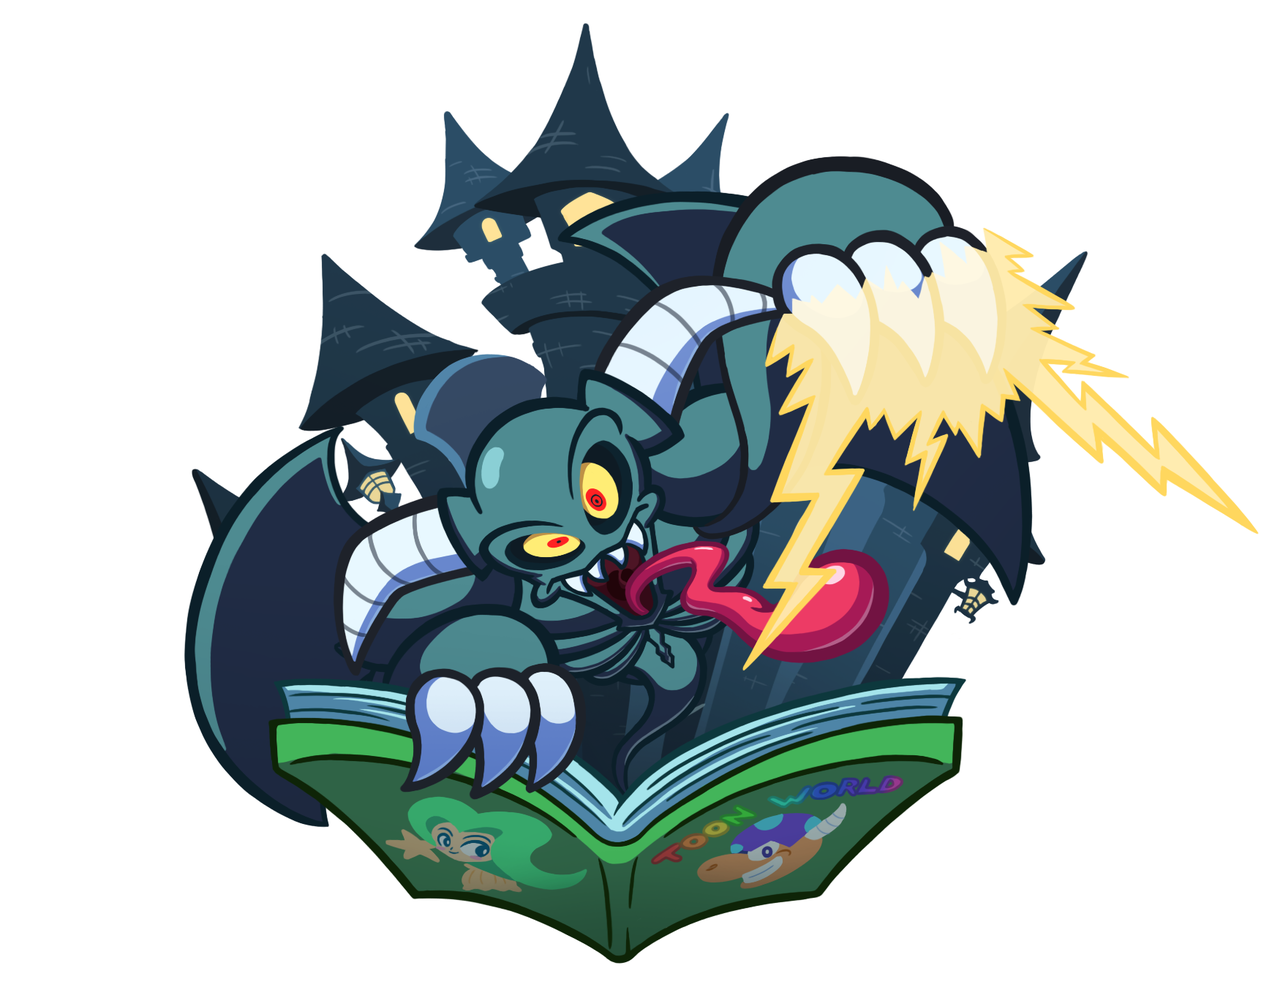

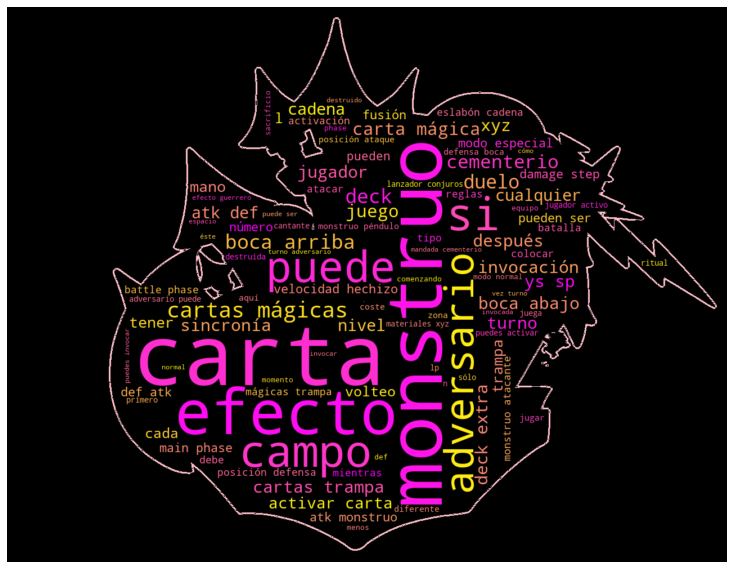

In [51]:
img = PIL.Image.open("C:/Users/XboxL/Documents/01 - Maestria En Analitica de Datos/02 - Procesamiento de Lenguaje Natural (NLP) - Clase/Recursos/carta.png")
mask = np.array(img)
display(img)

wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="black", colormap="spring",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=1, contour_color='pink').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

wordcloud.to_file("nlp_flor.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

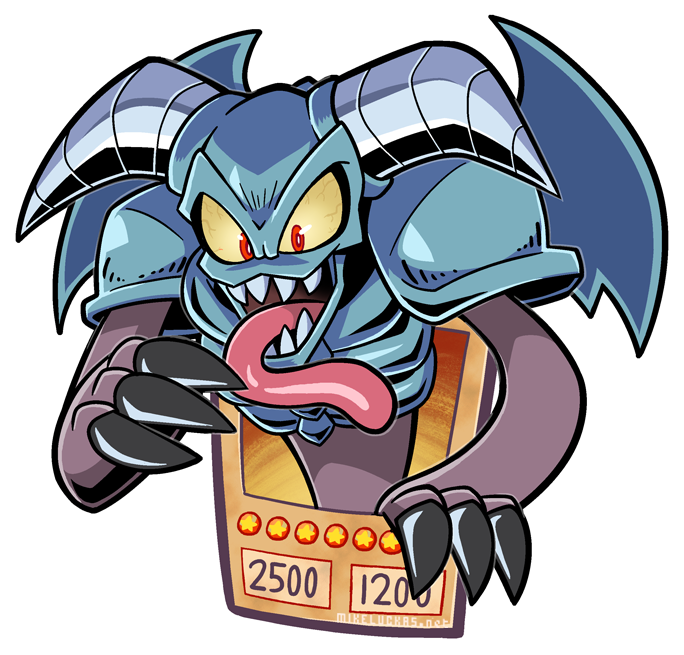

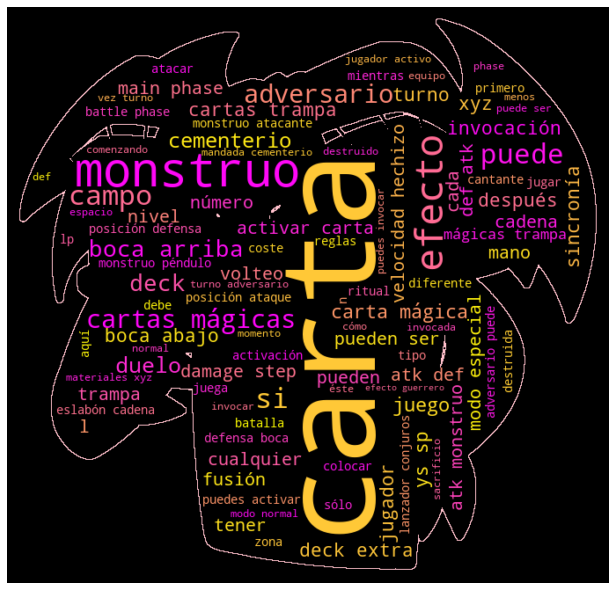

In [48]:
img = PIL.Image.open("C:/Users/XboxL/Documents/01 - Maestria En Analitica de Datos/02 - Procesamiento de Lenguaje Natural (NLP) - Clase/Recursos/carta2.png")
mask = np.array(img)
display(img)
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="black", colormap="spring",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=1, contour_color='pink').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

wordcloud.to_file("nlp_flor.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()